# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/devinaamangal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
authenticator = NewsApiClient(api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = authenticator.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
)

In [6]:
btc_articles

{'status': 'ok',
 'totalResults': 6948,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Jody Serrano',
   'title': 'Bitcoin Keeps Moving On Up, Reaching $33,000 in Value',
   'description': 'Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dipping slightly throughout the day.Read more...',
   'url': 'https://gizmodo.com/bitcoin-keeps-moving-on-up-reaching-33-000-in-value-1845979632',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ti4pnr0dzy4ilulignek.jpg',
   'publishedAt': '2021-01-03T03:03:00Z',
   'content': 'Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]'},
  {'sou

In [7]:
# Fetch the Ethereum news articles
eth_articles = authenticator.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
)

In [8]:
eth_articles

{'status': 'ok',
 'totalResults': 1483,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Lucas Matney',
   'title': 'Coinbase is going public via direct listing',
   'description': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today. The cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized tokens like bitcoin and ethereum. The company has raised over $…',
   'url': 'http://techcrunch.com/2021/01/28/coinbase-is-going-public-via-direct-listing/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/01/coinbase.jpg?w=750',
   'publishedAt': '2021-01-28T19:36:35Z',
   'content': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars]'},
  {'source': {'id': 'business-insider', 'name': 'Business Inside

In [9]:
def get_sentiment(articles):
    
    senti_out = []
    for article in articles:
        try:
            text      = article["content"]            
            sentiment = analyzer.polarity_scores(text)
            compound  = sentiment['compound']
            pos       = sentiment['pos']
            neg       = sentiment['neg']
            neu       = sentiment['neu']

                        
            senti_out.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral":  neu,
                "Positive": pos,
                "text":     text
            })
        except AttributeError:
            pass
    
    
    return pd.DataFrame(senti_out)

# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = get_sentiment(btc_articles['articles'])
btc_sentiment.head()

,Compound,Negative,Neutral,Positive,text
0,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
1,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
3,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...
4,0.6249,0.000,0.850,0.150,Cryptocurrency exchange company Gemini is acqu...


In [10]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = get_sentiment(eth_articles['articles'])
eth_sentiment.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.00,1.000,0.000,Coinbase plans to go public by way of a direct...
1,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...
2,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...
3,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...


In [11]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,92.000000,92.000000,92.000000,92.000000
mean,0.040525,0.021207,0.945239,0.033576
std,0.304919,0.041578,0.079591,0.062800
min,-0.612400,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.902500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.025675,0.000000,1.000000,0.057500
max,0.921700,0.176000,1.000000,0.353000


In [12]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,87.000000,87.000000,87.000000,87.000000
mean,0.134246,0.022793,0.921598,0.055609
std,0.352880,0.046811,0.081656,0.068814
min,-0.812600,0.000000,0.695000,0.000000
25%,0.000000,0.000000,0.875000,0.000000
50%,0.000000,0.000000,0.934000,0.038000
75%,0.386050,0.020000,1.000000,0.094000
max,0.900100,0.208000,1.000000,0.300000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(Stop)
    regex = re.compile("[^a-zA-Z ]")
    regex2 = re.compile("[…\+,'’]")
    text = regex2.sub('', text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    words = [x for x in words if x not in punctuation]
#     print(words)
    words = list(filter(lambda x:x not in punctuation, words))

    return [lemmatizer.lemmatize(word) for word in words if word not in sw]

In [16]:
# Create a new tokens column for bitcoin
btc_sentiment["tokens"] = btc_sentiment["text"].apply(tokenizer)
btc_sentiment.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
1,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[ban, reflects, twitter, failure, promote, hea..."
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[mt, gox, went, bankrupt, 2014, world, largest..."
3,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[new, york, cnn, business, bitcoin, flirting, ..."
4,0.6249,0.000,0.850,0.150,Cryptocurrency exchange company Gemini is acqu...,"[cryptocurrency, exchange, company, gemini, ac..."


In [17]:
# Create a new tokens column for ethereum
eth_sentiment["tokens"] = eth_sentiment["text"].apply(tokenizer)
eth_sentiment.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.00,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
1,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[cryptocurrencies, stole, headline, first, sto..."
2,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[ethereum, creator, vitalik, buterin, 14, 11, ..."
3,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[bitcoin, fizzled, monday, trading, famously, ..."
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[reuters, staff, file, photo, representation, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
flat_btc_tokens = [item for sublist in btc_sentiment.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_btc_tokens, n=2))
bigram_counts.most_common(20)

[(('file', 'photo'), 31),
 (('char', 'reuters'), 30),
 (('currency', 'bitcoin'), 30),
 (('virtual', 'currency'), 29),
 (('reuters', 'staff'), 29),
 (('representation', 'virtual'), 27),
 (('illustration', 'taken'), 27),
 (('photo', 'representation'), 26),
 (('bitcoin', 'seen'), 23),
 (('2020', 'reuters/dado'), 23),
 (('staff', 'file'), 22),
 (('reuters', 'bitcoin'), 17),
 (('taken', 'november'), 15),
 (('november', '19'), 15),
 (('19', '2020'), 15),
 (('new', 'york'), 13),
 (('reuters/dado', 'ruvic/illustration'), 11),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11)]

In [20]:
# Generate the Ethereum N-grams where N=2
flat_eth_tokens = [item for sublist in eth_sentiment.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_eth_tokens, n=2))
bigram_counts.most_common(20)

[(('file', 'photo'), 14),
 (('virtual', 'currency'), 14),
 (('photo', 'representation'), 13),
 (('representation', 'virtual'), 13),
 (('currency', 'bitcoin'), 13),
 (('illustration', 'taken'), 13),
 (('char', 'reuters'), 12),
 (('reuters', 'staff'), 12),
 (('staff', 'file'), 12),
 (('2020', 'reuters/dado'), 11),
 (('bitcoin', 'seen'), 10),
 (('char', 'bitcoin'), 9),
 (('reuters/dado', 'ruvic/illustration'), 6),
 (('taken', 'november'), 5),
 (('november', '19'), 5),
 (('19', '2020'), 5),
 (('seen', 'picture'), 5),
 (('picture', 'illustration'), 5),
 (('taken', 'taken'), 5),
 (('taken', 'march'), 5)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
token_count(flat_btc_tokens)

[('char', 90),
 ('bitcoin', 84),
 ('reuters', 75),
 ('currency', 42),
 ('photo', 40),
 ('taken', 33),
 ('file', 31),
 ('virtual', 30),
 ('staff', 29),
 ('2020', 29)]

In [23]:
# Get the top 10 words for Ethereum
token_count(flat_eth_tokens)

[('char', 86),
 ('bitcoin', 53),
 ('ethereum', 25),
 ('reuters', 24),
 ('cryptocurrency', 23),
 ('price', 21),
 ('currency', 19),
 ('photo', 19),
 ('taken', 19),
 ('new', 18)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

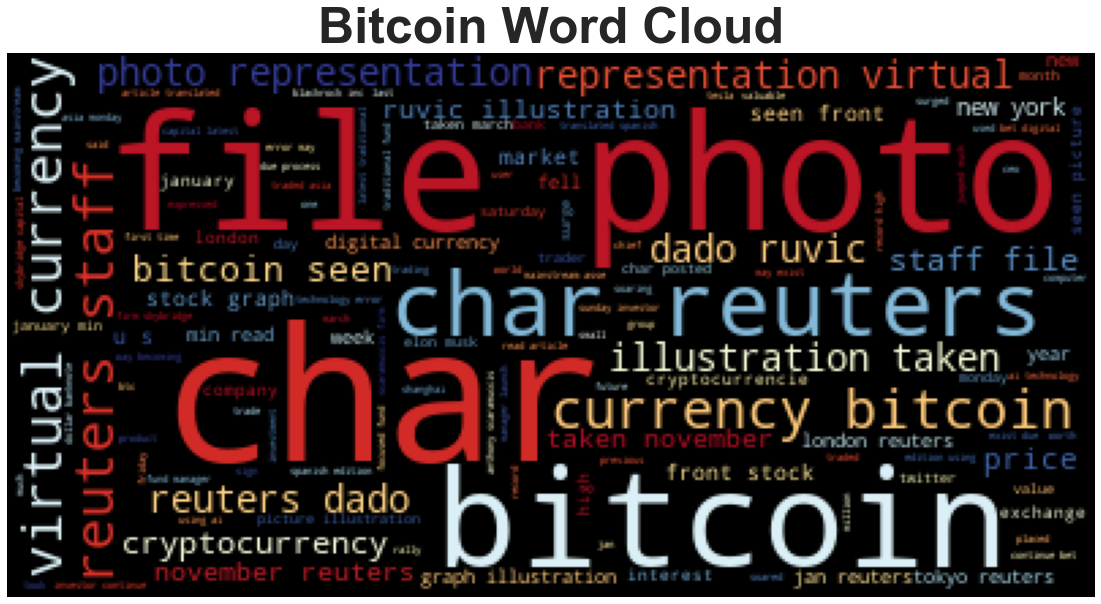

In [25]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

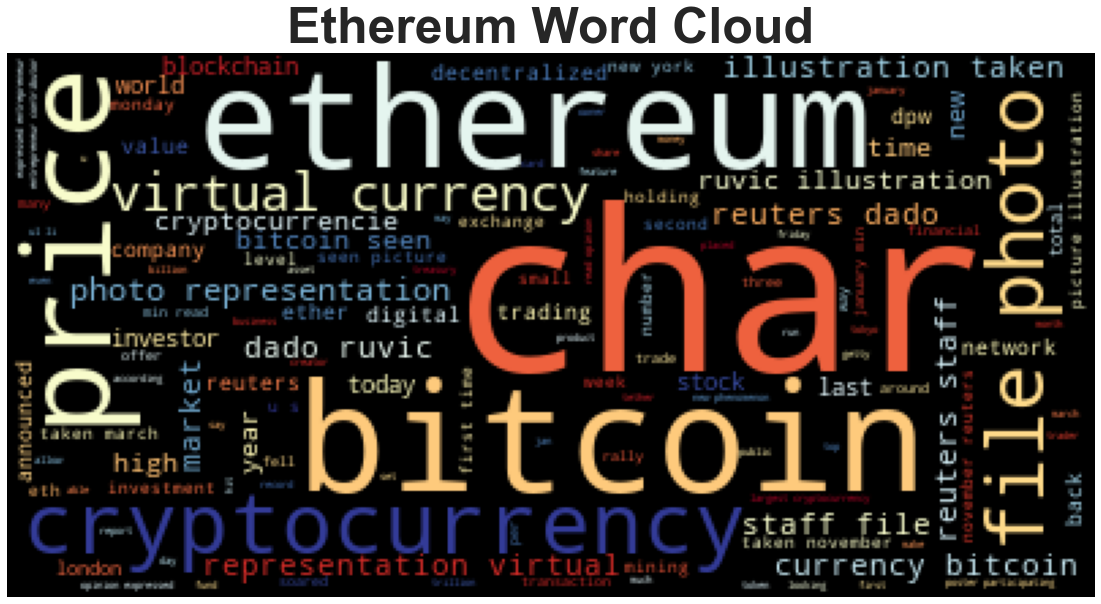

In [26]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 8.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [30]:
# Concatenate all of the bitcoin text together
# btc_sentiment.text.str.cat()
flat_btc_text_str = " ".join(btc_sentiment.text.to_list())
print(flat_btc_text_str)

Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars] Ban reflects Twitters failure to promote healthy conversation
Photo by Hannah McKay-Pool/Getty Images
Twitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars] When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars] New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The virtual currency is now valued at above $33,000, an all-ti… [+2108 chars] Cryptocurrency exchange company Gemini is acquiring Blockrize and announcing a new product today based on Blockrizes work. Later this year, the

In [31]:
# Run the NER processor on all of the text
btc_doc = nlp(flat_btc_text_str)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [33]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Just weeks DATE
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
New York GPE
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
Gemini PERSON
Blockrize PERSON
today DATE
Blockrizes GPE
Later this year DATE
Bitcoin GPE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin GPE
Friday, DATE
Tesla ORDINAL
Elon Musk ORG
Twitter ORG
Musk PERSON
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
bitcoin GPE
the popular cryptocurrency exchange ORG
today DATE
2012 DATE
India GPE
over millions CARDINAL
Last Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Square PRODUCT
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twitter and Square ORG
Reuters ORG
LONDON GPE
Jan 4 DATE


---

## Ethereum NER

In [35]:
# Concatenate all of the ethereum text together
flat_eth_text_str = " ".join(eth_sentiment.text.to_list())
print(flat_eth_text_str)

Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.
The cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars] Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.
But investors need not worry … [+2877 chars] Ethereum creator Vitalik Buterin.
14 with 11 posters participating
Ether, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars] Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.
Prices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars] By Reuters Staff
FILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvi

In [36]:
# Run the NER processor on all of the text
eth_doc = nlp(flat_eth_text_str)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [37]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [38]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

today DATE
2012 DATE
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Bitcoin GPE
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
January DATE
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
1 CARDINAL
1 CARDINAL
more than $1 trillion MONEY
bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 D